# I - Exploratory Data Analysis (EDA)

`In this section we'll be doing four things`:
<font color = brown>
 - Data Extraction: we'll load the dataset and have a first look at it.
 - Cleaning: We'll fill in missing values, if any.
 - Plotting: We'll create some interesting charts that'll (hopefully) spot correlations and hidden insights out of the data.
 - Assumptions: We'll formulate hypotheses from the charts.</font>

### Tweaking the style of the notebook to have centered plots

In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""");

### Importing the Useful libraries

In [2]:
# Ignore Warnings
import warnings 
warnings.filterwarnings('ignore')

import os
import numpy as np # linear algebra library
import pandas as pd # DataFrame creation and manipulation library
#pd.set_option('display.width', 1000)
#pd.set_option('display.max_columns', 500)
#pd.display.expand_frame_repr = True

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as pylab

# Configure visualizations
%matplotlib inline 
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 14, 10

os.listdir()

['match_results.ipynb',
 'ipl_match_prediction.ipynb',
 'data_dictionary.xlsx',
 'poetry.lock',
 '.git',
 'pyproject.toml',
 'README.md',
 'model_test_set_result.csv',
 'test.csv',
 'train.csv',
 '.ipynb_checkpoints',
 'ProblemStatement.txt']

As we can see above, we have our training dataset named train.csv and our test dataset named test.csv. **We'll be using our training dataset to build our predictive classification model and our test dataset for prediction of win/loss and the likelihood probability.**

In [3]:
train_df = pd.read_csv('train.csv')

`Shape of the training Dataset`

In [4]:
print('Shape of the training dataset {}'.format(train_df.shape))

Shape of the training dataset (252, 30)


We have :
- 252 rows 
- 30 columns

In [5]:
train_df.head()

,Game ID,Team 1,Team 2,City,DayOfWeek,DateOfGame,TimeOfGame,AvgWindSpeed,AvgHumidity,"Inn 1 Team 1 NOP R>25,SR>125",...,"Inn 2 Team 2 NOP R<25, SR>125",Inn 2 Team 2 Total 4s,Inn 2 Team 2 Total 6s,Inn 2 Team 2 Max Strike Rate_ALLBatsmen,Inn 2 Team 1 NoP fast bowlers,Inn 2 Team 1 NoP Spinners,Inn 2 Team 1 wickets taken_catches_runout,Inn2 Team 1 wickets taken_ bowled _lbw_caught by keeper_stumping,Inn 2 Team 1 Extras conceded in_wides_No Balls,"Winner (team 1=1, team 2=0)"
0,1,Koramangala Traffic Jammers,Whitefield Water Loggers,Whitefield,1,01-01-2012,20:00:00,6,0.49,1,...,0,3,3,120.00,5,0,6,4,11,1
1,2,Electronic City Power Savers,Silkboard Slow Movers,Silkboard,2,01-02-2012,17:00:00,7,0.44,3,...,2,18,9,215.15,4,1,4,0,5,1
2,3,Indranagar Pub Watchers,Sarjapur Water Tankers,Sarjapur,3,01-03-2012,20:30:00,11,0.23,2,...,1,18,1,300.00,3,3,0,1,10,0
3,4,Bellandur Froth Fighters,Koramangala Traffic Jammers,Koramangala,4,01-04-2012,16:00:00,6,0.61,0,...,0,5,4,100.00,4,2,3,2,16,0
4,5,Marathalli Chokers,Whitefield Water Loggers,Marathalli,5,01-05-2012,20:00:00,6,0.56,3,...,3,15,6,205.26,4,2,4,1,5,0


The *last column* **Winner (team 1=1, team 2=0)** is the target variable. If Winner = 1, that means that team 1 won the match or if Winner = 0, that implies that team 2 won the match.

`The other variables describe the match conditions and statistics for the two teams. They are our **features**.
 - Team 1 : Team batting first and bowling second
 - Team 2 : Team batting second and bowling first
 - City of match : City where the match is played
 - Day : Day of the week when the match is played
 - Date of Match : Date of the year when the match is played
 - Time of Match : Time of the day when the match is played
 - Avg Wind Speed : Average speed of the wind on the day when the match is played
 - Avg Humidity : Average humidity on the day when the match is played
 - Inn 1 Team 1 NOP R>25,SR>125 : NoP(Number of players) in Team 1 that scored more than 25 runs in first innings with a strike rate of more than  125
 - Inn 1 Team 1 NOP R<25, SR>125 : NoP(Number of players) in Team 1 that scored less than 25 runs in first innings with a strike rate of more than  125
 - Inn 1 Team 1 Total 4s : Total Number of 4s hit by Team 1 in the first innings
 - Inn 1 Team 1 Total 6s : Total Number of 6s hit by Team 1 in the first innings
 - Inn 1 Team 1 Max Strike Rate_ALLBatsmen : Maximum strike rate achieved including all batsmen for Team 1in first innings
 - Inn 1 Team 2 NoP fast bowlers : NoP(Number of players) in Team 2 who are fast bowlers, who bowl in first innings
 - Inn 1 Team 2 NoP Spinners : NoP(Number of players) in Team 2 who are spinners, who bowl in first innings
 - Inn 1 Team 2 wickets taken_catches_runout : Number of wickets taken by Team 2 in the first innings through Catches and Run Out performed through the assistance of fielders
 - Inn1 Team 2 wickets taken_ bowled _lbw_caught by keeper_stumping : Number of wickets taken by Team 2 in the first innings in the manner of 'Bowled', 'Leg before wicket','catch by wicket-keeper' and 'stumping by wicket-keeper'
 - Inn 1 Team 2 Extras conceded in_wides_No Balls : Total Number Extra runs conceded by Team 2 in the first innings in the manner of 'Wide ball' and 'No ball'
 - Inn 2 Team 2 NOP R>25,SR>125 : NoP(Number of players) in Team 2 that scored more than 25 runs in seond innings with a strike rate of more than  125
 - Inn 2 Team 2 NOP R<25, SR>125 : NoP(Number of players) in Team 2 that scored less than 25 runs in second innings with a strike rate of more than  125
 - Inn 2 Team 2 Total 4s : Total Number of 4s hit by Team 2 in the second innings
 - Inn 2 Team 2 Total 6s : Total Number of 6s hit by Team 2 in the second innings
 - Inn 2 Team 2 Max Strike Rate_ALLBatsmen : Maximum strike rate achieved including all batsmen for Team 2 in second innings
 - Inn 2 Team 1 NoP fast bowlers : NoP(Number of players) in Team 1 who are fast bowlers, who bowl in second innings
 - Inn 2 Team 1 NoP Spinners : NoP(Number of players) in Team 1 who are spinners, who bowl in second innings
 - Inn 2 Team 1 wickets taken_catches_runout : Number of wickets taken by Team 1 in the second innings through Catches and Run Out performed through the assistance of fielders
 - Inn 2 Team 1 wickets taken_ bowled _lbw_caught by keeper_stumping : Number of wickets taken by Team 1 in the second innings in the manner of 'Bowled', 'Leg before wicket','catch by wicket-keeper' and 'stumping by wicket-keeper'
 - Inn 2 Team 1 Extras conceded in_wides_No Balls : Total Number Extra runs conceded by Team 1 in the second innings in the manner of 'Wide ball' and 'No ball'

### Labelencoding for City, if City name in Team 1 then value 1 else 0

In [6]:
train_df['City'] = train_df.apply(lambda x : x['City'] in x['Team 1'], axis=1).astype(int)

In [7]:
train_df.describe()

# High-level simple statistical description of the numerical features. This can be done using the describe method.

,Game ID,City,DayOfWeek,AvgWindSpeed,AvgHumidity,"Inn 1 Team 1 NOP R>25,SR>125","Inn 1 Team 1 NOP R<25, SR>125",Inn 1 Team 1 Total 4s,Inn 1 Team 1 Total 6s,Inn 1 Team 1 Max Strike Rate_ALLBatsmen,...,"Inn 2 Team 2 NOP R<25, SR>125",Inn 2 Team 2 Total 4s,Inn 2 Team 2 Total 6s,Inn 2 Team 2 Max Strike Rate_ALLBatsmen,Inn 2 Team 1 NoP fast bowlers,Inn 2 Team 1 NoP Spinners,Inn 2 Team 1 wickets taken_catches_runout,Inn2 Team 1 wickets taken_ bowled _lbw_caught by keeper_stumping,Inn 2 Team 1 Extras conceded in_wides_No Balls,"Winner (team 1=1, team 2=0)"
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.00000,252.000000,252.000000,252.000000,252.000000,...,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,126.500000,0.380952,4.011905,7.440476,0.625198,1.43254,1.531746,13.726190,4.880952,198.511627,...,1.250000,12.658730,4.519841,188.509246,3.674603,2.146825,3.309524,2.091270,5.337302,0.440476
std,72.890329,0.486587,2.000960,2.353354,0.131620,0.98566,1.185480,4.666618,2.996963,69.901951,...,1.095536,4.379712,2.753412,56.843114,1.000632,0.976961,2.119777,1.610351,3.240880,0.497432
min,1.000000,0.000000,1.000000,3.000000,0.160000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,63.750000,0.000000,2.000000,6.000000,0.560000,1.00000,1.000000,11.000000,3.000000,161.110000,...,0.000000,10.000000,2.750000,153.092500,3.000000,1.000000,2.000000,1.000000,3.000000,0.000000
50%,126.500000,0.000000,4.000000,7.000000,0.655000,1.00000,1.000000,14.000000,5.000000,185.710000,...,1.000000,12.000000,4.000000,185.710000,4.000000,2.000000,3.000000,2.000000,5.000000,0.000000
75%,189.250000,1.000000,6.000000,8.000000,0.720000,2.00000,2.000000,17.000000,7.000000,220.000000,...,2.000000,16.000000,6.000000,222.220000,4.000000,3.000000,5.000000,3.000000,7.000000,1.000000
max,252.000000,1.000000,7.000000,22.000000,0.880000,4.00000,6.000000,25.000000,17.000000,600.000000,...,5.000000,25.000000,14.000000,385.710000,6.000000,5.000000,9.000000,8.000000,16.000000,1.000000


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 30 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Game ID                                                           252 non-null    int64  
 1   Team 1                                                            252 non-null    object 
 2   Team 2                                                            252 non-null    object 
 3   City                                                              252 non-null    int64  
 4   DayOfWeek                                                         252 non-null    int64  
 5   DateOfGame                                                        252 non-null    object 
 6   TimeOfGame                                                        252 non-null    object 
 7   AvgWindSpeed                       

### From the above info method of pandas we can see that the train data doesn't have any null/missing values.

In [9]:
train_df.dtypes

Game ID                                                               int64
Team 1                                                               object
Team 2                                                               object
City                                                                  int64
DayOfWeek                                                             int64
DateOfGame                                                           object
TimeOfGame                                                           object
AvgWindSpeed                                                          int64
AvgHumidity                                                         float64
Inn 1 Team 1 NOP R>25,SR>125                                          int64
Inn 1 Team 1 NOP R<25, SR>125                                         int64
Inn 1 Team 1 Total 4s                                                 int64
Inn 1 Team 1 Total 6s                                                 int64
Inn 1 Team 1

**` From the above dtype values we see that, we have 5 object type of categorical, ordinal, etc variables`**

Let's now make some charts. <br>
Let's visualize the number of wins according to team 1

<AxesSubplot:xlabel='Team 1'>

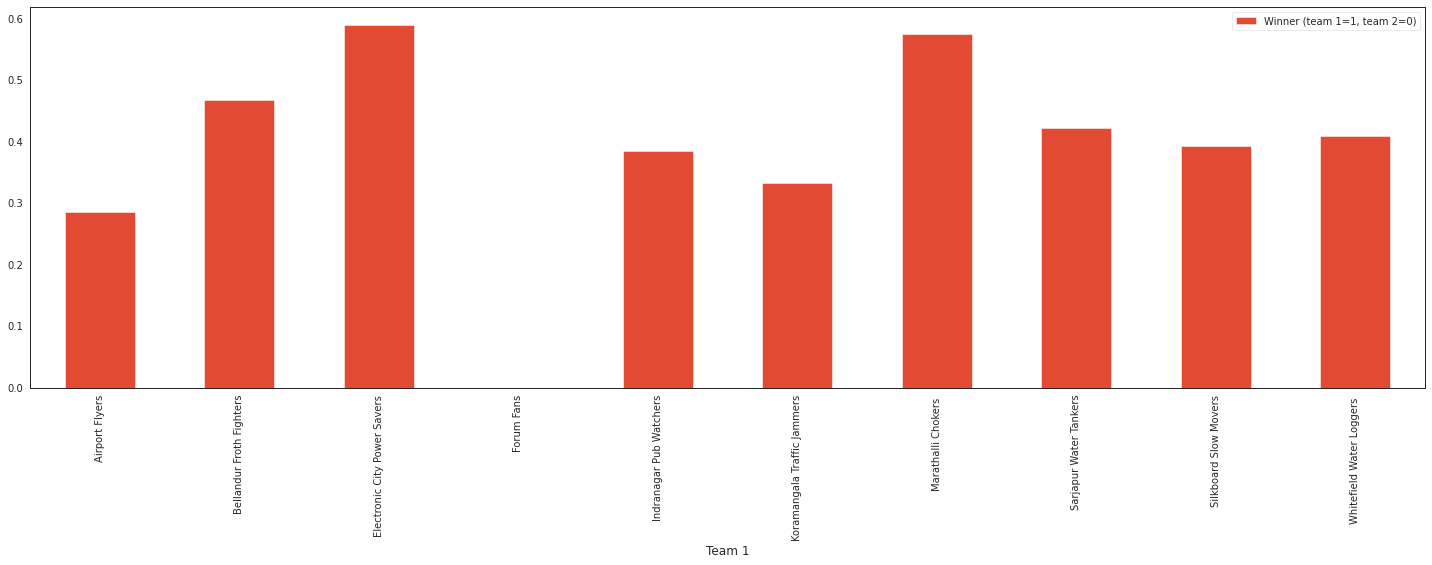

In [10]:
train_df.groupby('Team 1').agg('mean')[['Winner (team 1=1, team 2=0)']].plot(kind='bar', figsize=(25, 7),
                                                          stacked=True)#, colors=['g', 'r']);

**It looks like most teams leaving electronic city and marathalli chokers have less than 50 % chance when batting first to win and the forum fans have never won when batting first.**

<AxesSubplot:xlabel='Team 2'>

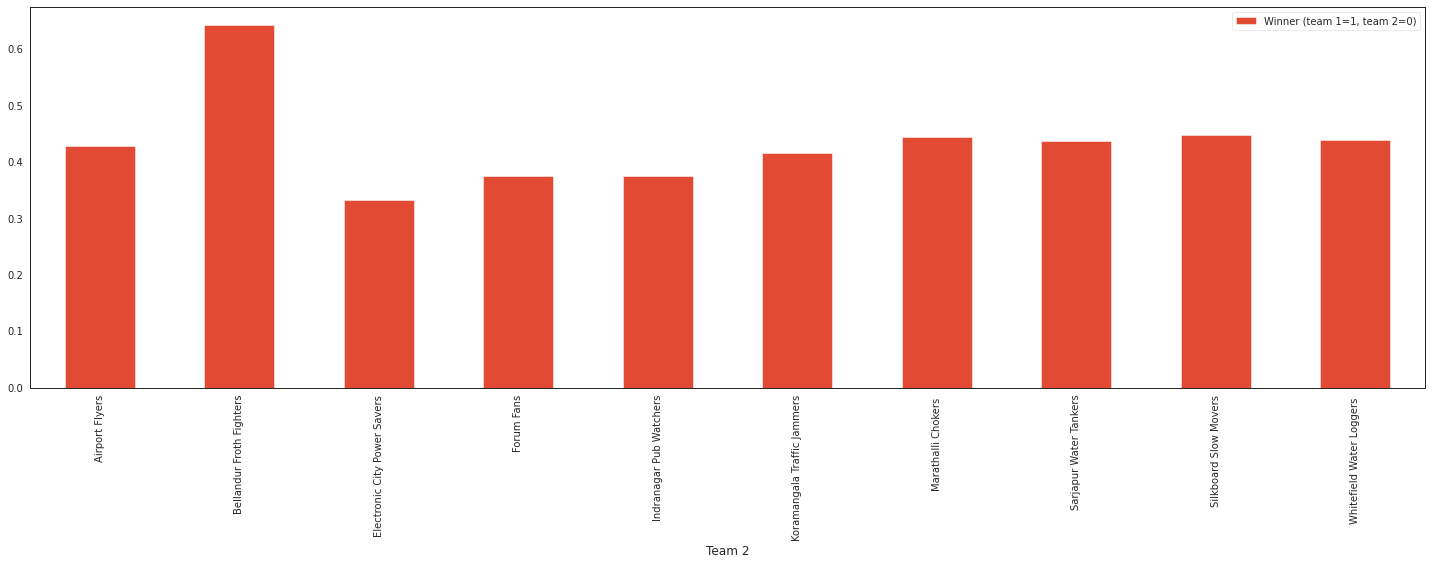

In [11]:
train_df.groupby('Team 2').agg('mean')[['Winner (team 1=1, team 2=0)']].plot(kind='bar', figsize=(25, 7),
                                                          stacked=True)#, colors=['g', 'r']);

<AxesSubplot:xlabel='AvgWindSpeed'>

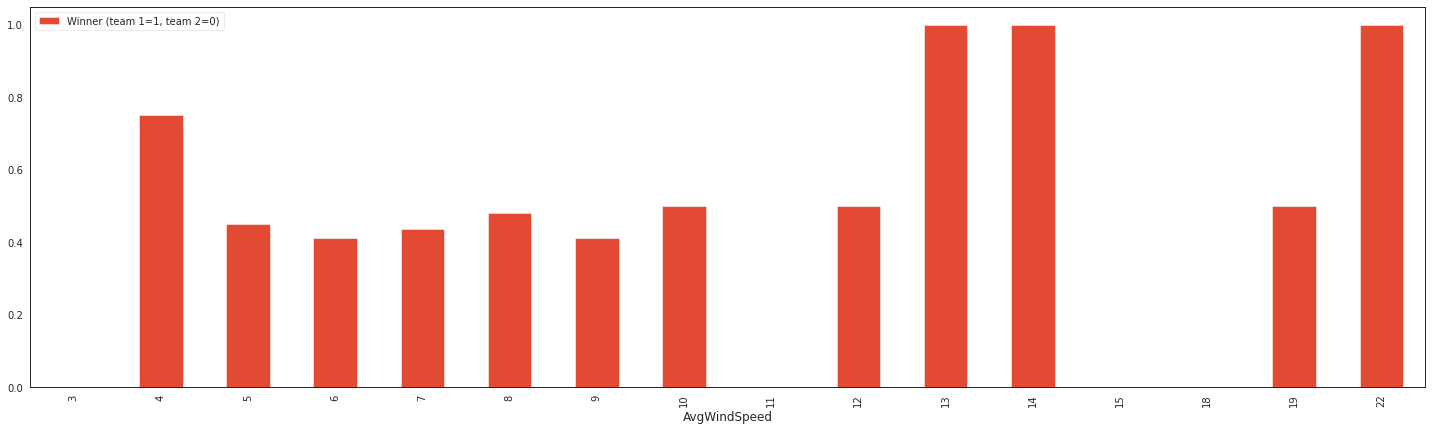

In [12]:
train_df.groupby('AvgWindSpeed').agg('mean')[['Winner (team 1=1, team 2=0)']].plot(kind='bar', figsize=(25, 7),
                                                          stacked=True) #, colors=['g', 'r']);

### From the above graph I don't think that average wind speed is a good variable

<AxesSubplot:xlabel='AvgHumidity'>

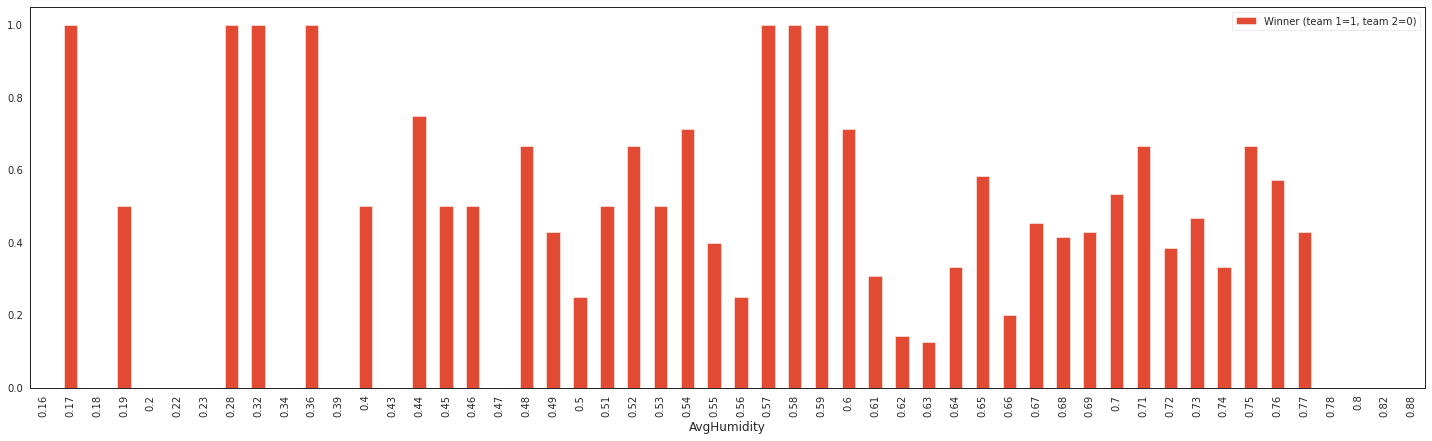

In [13]:
train_df.groupby('AvgHumidity').agg('mean')[['Winner (team 1=1, team 2=0)']].plot(kind='bar', figsize=(25, 7),
                                                          stacked=True)#, colors=['g', 'r']);

<AxesSubplot:xlabel='TimeOfGame'>

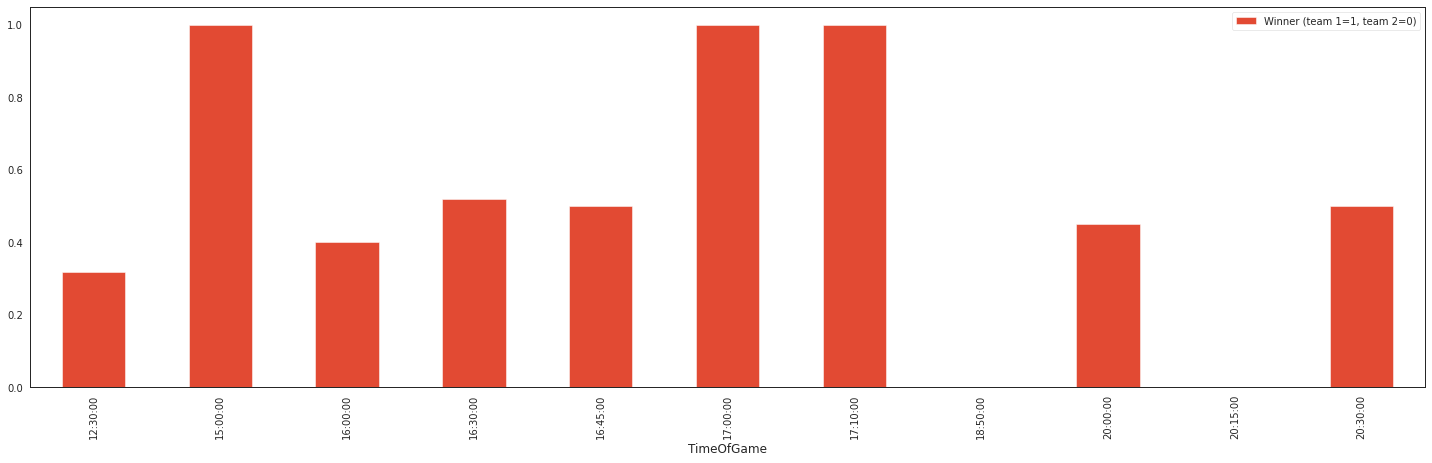

In [14]:
train_df.groupby('TimeOfGame').agg('mean')[['Winner (team 1=1, team 2=0)']].plot(kind='bar', figsize=(25, 7),
                                                          stacked=True) #, colors=['g', 'r']);

**` AvgHumidity also looks like a useless variable `**

### Have to derive some meaning from the above charts

` What about which team is playing does that affect the match situation like some team wins regularly`

In [15]:
def plot_correlation_map( df ):
    corr = train_df.corr()
    _ , ax = plt.subplots( figsize =( 24 , 24 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )


### A heatmap of correlation may give us a understanding of which variables are important

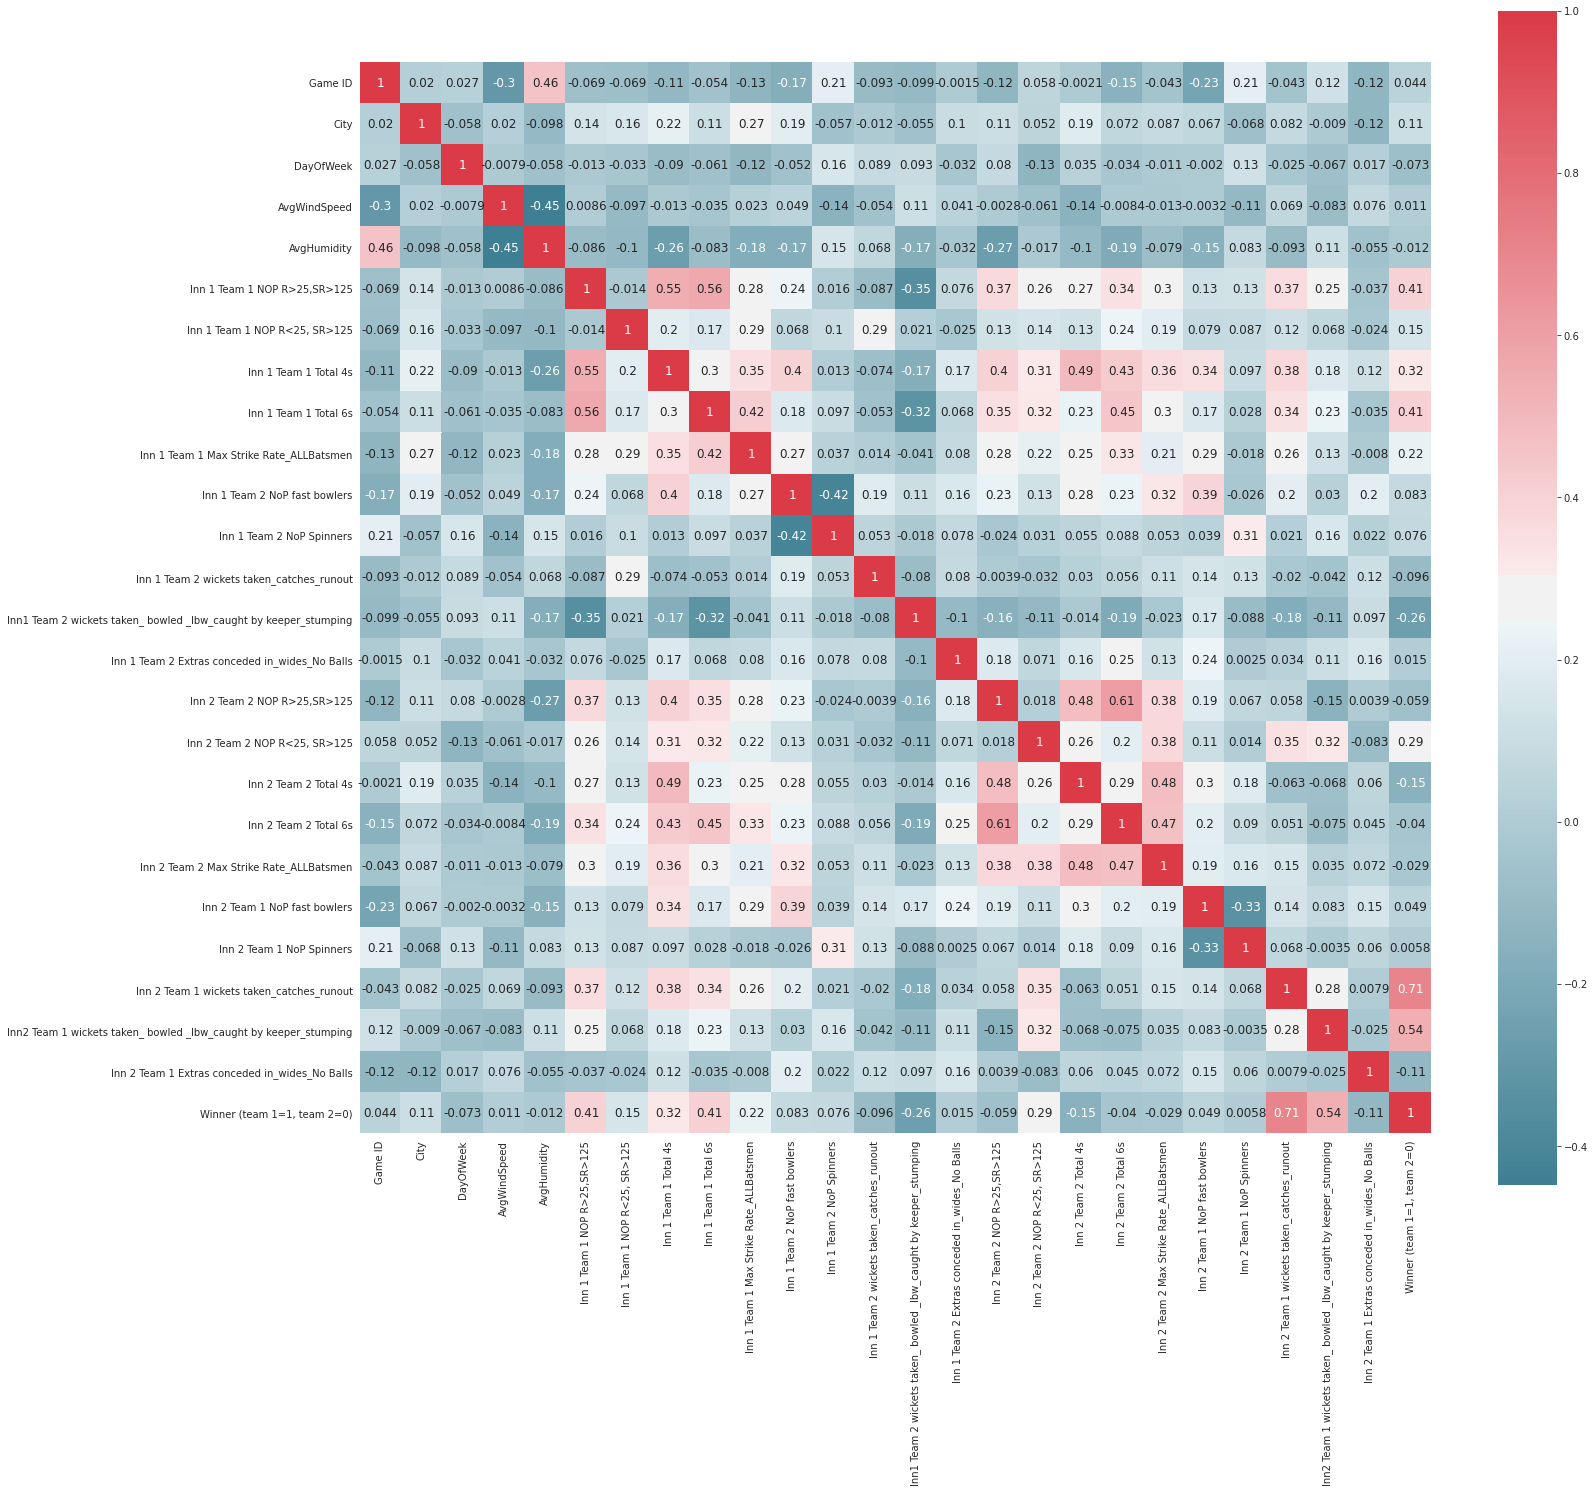

In [16]:
plot_correlation_map(train_df)

In [17]:
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

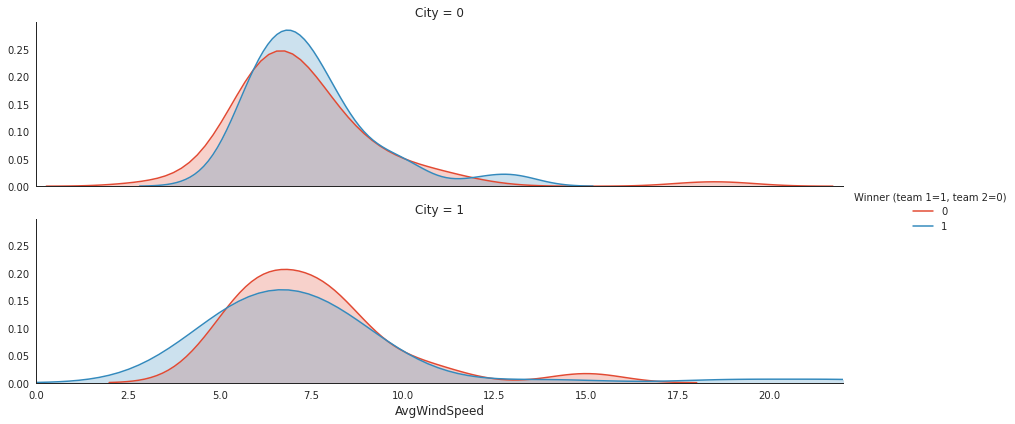

In [18]:
plot_distribution( train_df, var = 'AvgWindSpeed' , target = 'Winner (team 1=1, team 2=0)' , row = 'City' )


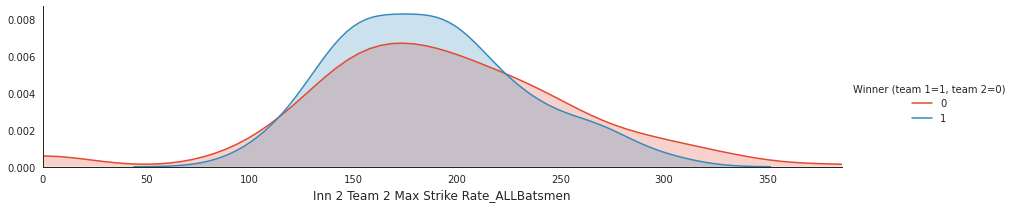

In [19]:
plot_distribution( train_df , var = 'Inn 2 Team 2 Max Strike Rate_ALLBatsmen' , target = 'Winner (team 1=1, team 2=0)'  )

In [20]:
def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col, aspect=4 )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

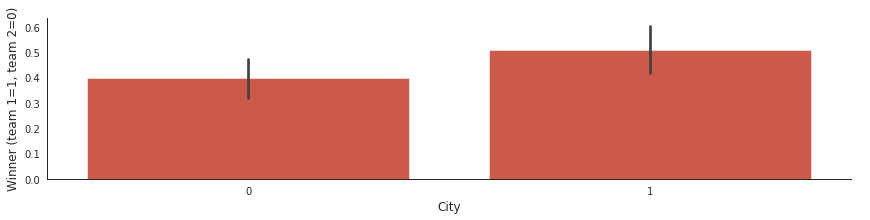

In [21]:
plot_categories(train_df, cat = 'City', target = 'Winner (team 1=1, team 2=0)')

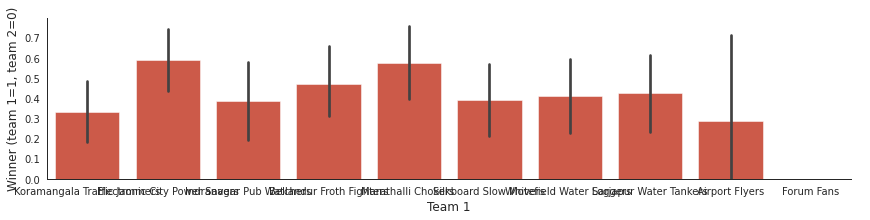

In [22]:
plot_categories(train_df, cat = 'Team 1', target = 'Winner (team 1=1, team 2=0)')

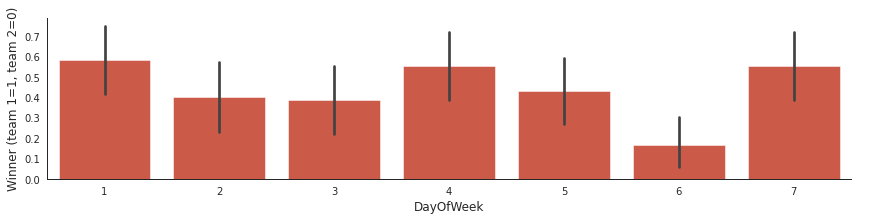

In [23]:
plot_categories(train_df, cat = 'DayOfWeek', target = 'Winner (team 1=1, team 2=0)')

#### Time of Game can be divided into before 5pm and after 5pm

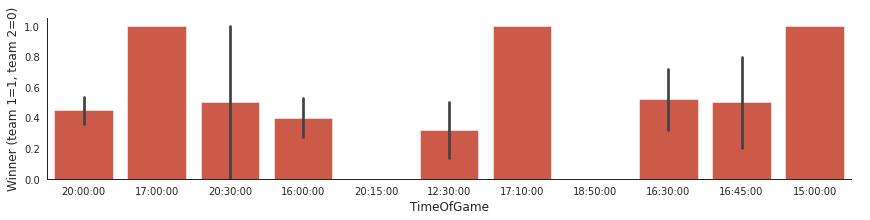

In [24]:
plot_categories(train_df, cat = 'TimeOfGame', target = 'Winner (team 1=1, team 2=0)')

In [25]:
train_df.groupby('TimeOfGame').agg('count')[['Game ID']]

,Game ID
TimeOfGame,
12:30:00,22
15:00:00,1
16:00:00,55
16:30:00,25
16:45:00,10
17:00:00,1
17:10:00,1
18:50:00,1
20:00:00,133


In [26]:
def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )

In [27]:
np.bincount(train_df['Winner (team 1=1, team 2=0)'])

array([141, 111])

**`141/252 = 55.9 % 111/252 = 44 % , therefore our problem is a balanced class 
 problem and we need not get into other evaluation metrics such as F1 score , etc.`**

## I am dropping the categorical variables at the start to make a beginner model

In [28]:
X = train_df.drop(columns = ['Game ID', 'Team 1', 'Team 2', 'DayOfWeek', 'DateOfGame', 'TimeOfGame', 'Winner (team 1=1, team 2=0)'])
y = train_df.iloc[:, -1]

**` Shape after dropping the categorical variables`**

In [29]:
X.shape

(252, 23)

## Finding the most important features by using decision tree/random forest estimator

In [30]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(X, y)

In [31]:
features = pd.DataFrame()
features['feature'] = X.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

<AxesSubplot:ylabel='feature'>

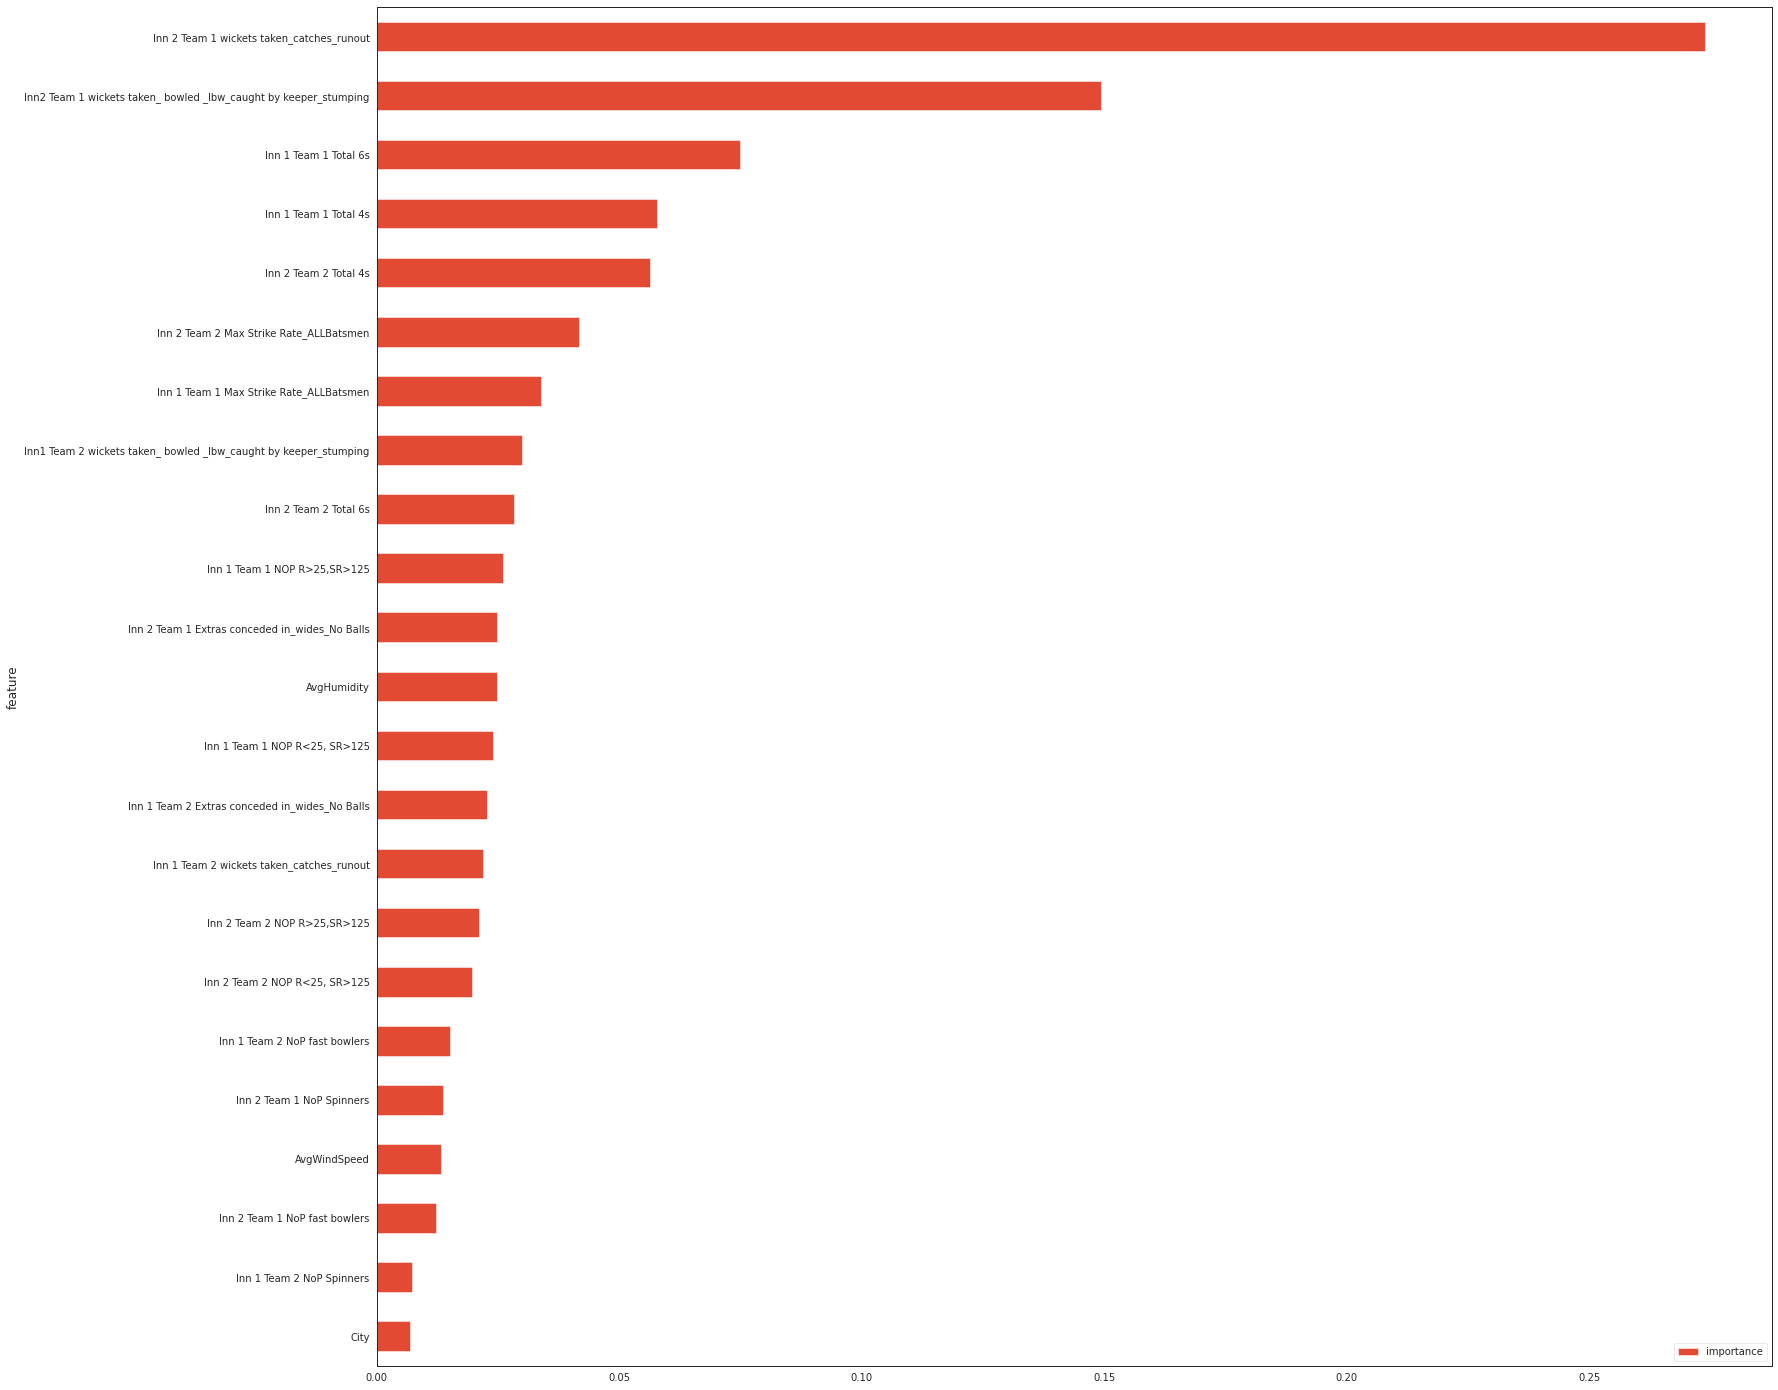

In [32]:
features.plot(kind='barh', figsize=(25, 25))

## Reducing the number of features according to the variance of the variables using SelectModel

In [33]:
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(X)
print(train_reduced.shape)

(252, 5)


In [34]:
"""
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scale.fit(X)

# Apply transform to both train and test set
X = scale.transform(X)
"""

'\nfrom sklearn.preprocessing import StandardScaler\n\nscale = StandardScaler()\nscale.fit(X)\n\n# Apply transform to both train and test set\nX = scale.transform(X)\n'

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [36]:
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()

models = [logreg, logreg_cv, rf, gboost]

### Using 5-fold Cross Validation to understand the worst performance of the model and the average

### Might have to use pipelines here!

In some cases (e.g. when feature values have very different ranges), we've seen the need to scale or normalize the training and test sets before use with a classifier. The proper way to do cross-validation when you need to scale the data is not to scale the entire dataset with a single transform, since this will indirectly leak information into the training data about the whole dataset, including the test data. Instead, scaling/normalizing must be computed and applied for each cross-validation fold separately. To do this, the easiest way in scikit-learn is to use pipelines.

http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

In [37]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [38]:
for model1 in models:
    print('Cross-validation of : {0}'.format(model1.__class__))
    score = compute_score(clf=model1, X=train_reduced, y=y, scoring='accuracy')
    print('CV score = {0}'.format(score))
    print('****')

Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegression'>
CV score = 0.9169411764705881
****
Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegressionCV'>
CV score = 0.9129411764705881
****
Cross-validation of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
CV score = 0.8932549019607844
****
Cross-validation of : <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
CV score = 0.8852549019607844
****


In [39]:
test_df = pd.read_csv('test.csv')
test_df.head()

,Game ID,Team 1,Team 2,CityOfGame,Day,DateOfGame,TimeOfGame,AvgWindSpeed,AvgHumidity,"Inn 1 Team 1 NOP R>25,SR>125",...,"Inn 2 Team 2 NOP R<25, SR>125",Inn 2 Team 2 Total 4s,Inn 2 Team 2 Total 6s,Inn 2 Team 2 Max Strike Rate_ALLBatsmen,Inn 2 Team 1 NoP fast bowlers,Inn 2 Team 1 NoP Spinners,Inn 2 Team 1 wickets taken_catches_runout,Inn2 Team 1 wickets taken_ bowled _lbw_caught by keeper_stumping,Inn 2 Team 1 Extras conceded in_wides_No Balls,"Winner (team 1=1, team 2=0)"
0,253,Electronic City Power Savers,Marathalli Chokers,Electronic City,6,01-01-2016,20:00:00,5,0.62,1,...,0,9,5,142.85,3,3,1,1,3,0
1,254,Koramangala Traffic Jammers,Sarjapur Water Tankers,Koramangala,7,01-02-2016,20:00:00,6,0.66,1,...,1,8,4,210.00,3,2,1,1,1,0
2,255,HSR High Rent Payers,Marathalli Chokers,Marathalli,1,01-03-2016,16:00:00,5,0.64,0,...,1,8,1,166.66,4,2,2,7,4,1
3,256,Indranagar Pub Watchers,Silkboard Slow Movers,Indranagar,2,01-04-2016,20:00:00,5,0.64,1,...,3,14,4,166.66,2,4,6,3,2,1
4,257,Whitefield Water Loggers,Sarjapur Water Tankers,Whitefield,3,01-05-2016,16:00:00,5,0.62,2,...,2,13,2,160.00,4,2,6,1,2,1


In [40]:
test_df.shape

(76, 30)

In [41]:
test_df.columns

Index(['Game ID', 'Team 1', 'Team 2', 'CityOfGame', 'Day', 'DateOfGame',
       'TimeOfGame', 'AvgWindSpeed', 'AvgHumidity',
       'Inn 1 Team 1 NOP R>25,SR>125', 'Inn 1 Team 1 NOP R<25, SR>125',
       'Inn 1 Team 1 Total 4s', 'Inn 1 Team 1 Total 6s',
       'Inn 1 Team 1 Max Strike Rate_ALLBatsmen',
       'Inn 1 Team 2 NoP fast bowlers', 'Inn 1 Team 2 NoP Spinners',
       'Inn 1 Team 2 wickets taken_catches_runout',
       'Inn1 Team 2 wickets taken_ bowled _lbw_caught by keeper_stumping',
       'Inn 1 Team 2 Extras conceded in_wides_No Balls',
       'Inn 2 Team 2 NOP R>25,SR>125', 'Inn 2 Team 2 NOP R<25, SR>125',
       'Inn 2 Team 2 Total 4s', 'Inn 2 Team 2 Total 6s',
       'Inn 2 Team 2 Max Strike Rate_ALLBatsmen',
       'Inn 2 Team 1 NoP fast bowlers', 'Inn 2 Team 1 NoP Spinners',
       'Inn 2 Team 1 wickets taken_catches_runout',
       'Inn2 Team 1 wickets taken_ bowled _lbw_caught by keeper_stumping',
       'Inn 2 Team 1 Extras conceded in_wides_No Balls',
       'Win

In [42]:
set(train_df['Team 1'])

{'Airport Flyers',
 'Bellandur Froth Fighters',
 'Electronic City Power Savers',
 'Forum Fans',
 'Indranagar Pub Watchers',
 'Koramangala Traffic Jammers',
 'Marathalli Chokers ',
 'Sarjapur Water Tankers',
 'Silkboard Slow Movers',
 'Whitefield Water Loggers '}

In [43]:
train_df['Team 2'].unique()

array(['Whitefield Water Loggers ', 'Silkboard Slow Movers',
       'Sarjapur Water Tankers', 'Koramangala Traffic Jammers',
       'Indranagar Pub Watchers', 'Marathalli Chokers ',
       'Electronic City Power Savers', 'Bellandur Froth Fighters',
       'Forum Fans', 'Airport Flyers'], dtype=object)

In [44]:
test_df['Team 1'].unique()

array(['Electronic City Power Savers', 'Koramangala Traffic Jammers',
       'HSR High Rent Payers', 'Indranagar Pub Watchers',
       'Whitefield Water Loggers ', 'Bellandur Froth Fighters',
       'Marathalli Chokers ', 'Silkboard Slow Movers',
       'Sarjapur Water Tankers'], dtype=object)

### Labelencoding if the home team is team 1 city is 1 else 0

In [45]:
test_df['CityOfGame'] = test_df.apply(lambda x : x['CityOfGame'] in x['Team 1'], axis=1).astype(int)

### K-Nearest neighbors can be a reasonable baseline for comparison

In [46]:
X = train_df.drop(columns = ['Game ID', 'Team 1', 'Team 2', 'DayOfWeek', 'DateOfGame', 'TimeOfGame', 'Winner (team 1=1, team 2=0)'])
y = train_df.iloc[:, -1]

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [48]:
X_train = X_train.astype('float')
X_test = X_test.astype('float')

In [49]:
"""
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

"""
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

# Apply transform to both train and test set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

Accuracy of K-NN classifier on training set: 0.89
Accuracy of K-NN classifier on test set: 0.89


In [51]:
train_df.dtypes

Game ID                                                               int64
Team 1                                                               object
Team 2                                                               object
City                                                                  int64
DayOfWeek                                                             int64
DateOfGame                                                           object
TimeOfGame                                                           object
AvgWindSpeed                                                          int64
AvgHumidity                                                         float64
Inn 1 Team 1 NOP R>25,SR>125                                          int64
Inn 1 Team 1 NOP R<25, SR>125                                         int64
Inn 1 Team 1 Total 4s                                                 int64
Inn 1 Team 1 Total 6s                                                 int64
Inn 1 Team 1

In [52]:
len(y_train)

189

In [53]:
train_df.columns.values

array(['Game ID', 'Team 1', 'Team 2', 'City', 'DayOfWeek', 'DateOfGame',
       'TimeOfGame', 'AvgWindSpeed', 'AvgHumidity',
       'Inn 1 Team 1 NOP R>25,SR>125', 'Inn 1 Team 1 NOP R<25, SR>125',
       'Inn 1 Team 1 Total 4s', 'Inn 1 Team 1 Total 6s',
       'Inn 1 Team 1 Max Strike Rate_ALLBatsmen',
       'Inn 1 Team 2 NoP fast bowlers', 'Inn 1 Team 2 NoP Spinners',
       'Inn 1 Team 2 wickets taken_catches_runout',
       'Inn1 Team 2 wickets taken_ bowled _lbw_caught by keeper_stumping',
       'Inn 1 Team 2 Extras conceded in_wides_No Balls',
       'Inn 2 Team 2 NOP R>25,SR>125', 'Inn 2 Team 2 NOP R<25, SR>125',
       'Inn 2 Team 2 Total 4s', 'Inn 2 Team 2 Total 6s',
       'Inn 2 Team 2 Max Strike Rate_ALLBatsmen',
       'Inn 2 Team 1 NoP fast bowlers', 'Inn 2 Team 1 NoP Spinners',
       'Inn 2 Team 1 wickets taken_catches_runout',
       'Inn2 Team 1 wickets taken_ bowled _lbw_caught by keeper_stumping',
       'Inn 2 Team 1 Extras conceded in_wides_No Balls',
       'Win

In [54]:
train_df['TimeOfGame'].unique()

array(['20:00:00', '17:00:00', '20:30:00', '16:00:00', '20:15:00',
       '12:30:00', '17:10:00', '18:50:00', '16:30:00', '16:45:00',
       '15:00:00'], dtype=object)

In [55]:
train_df.info()
print('-'* 40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 30 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Game ID                                                           252 non-null    int64  
 1   Team 1                                                            252 non-null    object 
 2   Team 2                                                            252 non-null    object 
 3   City                                                              252 non-null    int64  
 4   DayOfWeek                                                         252 non-null    int64  
 5   DateOfGame                                                        252 non-null    object 
 6   TimeOfGame                                                        252 non-null    object 
 7   AvgWindSpeed                       

### Things to do:
**` Bring in likelihood using predict_proba, then cross validation, then grid searchCV, then EDA for categorical variables, then also which algorithm to use - most suggest RandomForest`**

In [56]:
test_df.columns

Index(['Game ID', 'Team 1', 'Team 2', 'CityOfGame', 'Day', 'DateOfGame',
       'TimeOfGame', 'AvgWindSpeed', 'AvgHumidity',
       'Inn 1 Team 1 NOP R>25,SR>125', 'Inn 1 Team 1 NOP R<25, SR>125',
       'Inn 1 Team 1 Total 4s', 'Inn 1 Team 1 Total 6s',
       'Inn 1 Team 1 Max Strike Rate_ALLBatsmen',
       'Inn 1 Team 2 NoP fast bowlers', 'Inn 1 Team 2 NoP Spinners',
       'Inn 1 Team 2 wickets taken_catches_runout',
       'Inn1 Team 2 wickets taken_ bowled _lbw_caught by keeper_stumping',
       'Inn 1 Team 2 Extras conceded in_wides_No Balls',
       'Inn 2 Team 2 NOP R>25,SR>125', 'Inn 2 Team 2 NOP R<25, SR>125',
       'Inn 2 Team 2 Total 4s', 'Inn 2 Team 2 Total 6s',
       'Inn 2 Team 2 Max Strike Rate_ALLBatsmen',
       'Inn 2 Team 1 NoP fast bowlers', 'Inn 2 Team 1 NoP Spinners',
       'Inn 2 Team 1 wickets taken_catches_runout',
       'Inn2 Team 1 wickets taken_ bowled _lbw_caught by keeper_stumping',
       'Inn 2 Team 1 Extras conceded in_wides_No Balls',
       'Win

In [57]:
X = test_df.drop(columns = ['Game ID', 'Team 1', 'Team 2', 'Day', 'DateOfGame', 'TimeOfGame', 'Winner (team 1=1, team 2=0)'])
#y = train_df.iloc[:, -1]

In [58]:
X.shape

(76, 23)

In [59]:
y_test = test_df.iloc[:, -1]

In [60]:
test_reduced = model.transform(X)

In [61]:
#test_reduced = scale.transform(test_reduced)

### Standardization not required for logistic regression

In [62]:
LogisticRegression().fit(train_reduced, y).predict(test_reduced)

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0])

### Predicted Probabilities for Team 1

In [63]:
y_proba_lr = LogisticRegression().fit(train_reduced, y).predict_proba(test_reduced)

In [64]:
y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20,1]))

# show the probability of positive class for first 20 instances
y_proba_list

[(0, 0.0008122176968133849),
 (0, 0.0044205431708062865),
 (1, 0.8879098980694904),
 (1, 0.9916426829375473),
 (1, 0.78802848897376),
 (1, 0.9980626302925077),
 (1, 0.993993357439003),
 (1, 0.9518957032135292),
 (0, 0.3012748185105126),
 (1, 0.9965158617441041),
 (0, 0.0013338706729932816),
 (1, 0.9990658377048659),
 (0, 0.680270413849171),
 (0, 0.002227090333280201),
 (0, 0.11632886284494656),
 (0, 0.01853901014963525),
 (1, 0.45846078266970375),
 (1, 0.9996862478301608),
 (0, 0.018994192995038895),
 (0, 0.08311708934424537)]

In [65]:
lr = LogisticRegression().fit(train_reduced, y)
lr

LogisticRegression()

In [66]:
lr.score(test_reduced, y_test)

0.881578947368421

In [67]:
lr.score(train_reduced, y)

0.9166666666666666

In [68]:
train_reduced.shape

(252, 5)

In [69]:
y.shape

(252,)

In [70]:
y_train.shape

(189,)

### Using Grid Search to find the best value of the parameter gamma that defines the amount of margin for the SVM classifier

In [71]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

clf = SVC(kernel='rbf')
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(train_reduced, y)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(test_reduced) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

Grid best parameter (max. accuracy):  {'gamma': 0.01}
Grid best score (accuracy):  0.9130196078431372


In [72]:
result = pd.DataFrame(list(zip( lr.predict(test_reduced), y_test, y_proba_lr[:, 1])), columns=[ 'predicted','targets','probability'])

In [73]:
result.head(10)

,predicted,targets,probability
0,0,0,0.000812
1,0,0,0.004421
2,1,1,0.887910
3,1,1,0.991643
4,1,1,0.788028
5,1,1,0.998063
6,1,1,0.993993
7,1,1,0.951896
8,0,0,0.301275
9,1,1,0.996516


In [74]:
result.to_csv('model_test_set_result.csv')

### PCA for visualization and understanding if data is separable linearly

In [75]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scale.fit(train_reduced)

# Apply transform to both train and test set
train_reduced = scale.transform(train_reduced)

In [76]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(train_reduced)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])#, 'principal component 3'])

In [77]:
finalDf = pd.concat([principalDf, train_df['Winner (team 1=1, team 2=0)']], axis = 1)

In [78]:
finalDf

,principal component 1,principal component 2,"Winner (team 1=1, team 2=0)"
0,-1.875004,2.830390,1
1,-2.732033,-1.465978,1
2,0.923633,-1.850377,0
3,1.438171,1.624932,0
4,-0.646907,-0.836566,0
...,...,...,...
247,-1.115666,-1.341716,0
248,-0.062432,-0.400845,0
249,-0.396630,-0.870372,0
250,-1.008822,0.688677,1


#### Looks to be fairly linearly separable

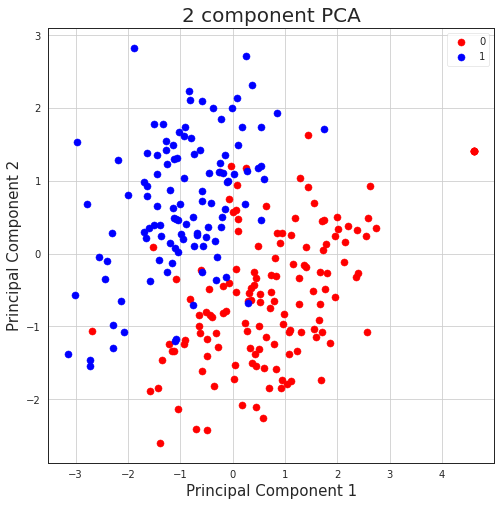

In [79]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0 , 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Winner (team 1=1, team 2=0)'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#### Applying logistic regression now to the data, C=0.01 worked best for us

In [80]:
lr = LogisticRegression(C=0.01).fit(principalComponents, y)
lr

LogisticRegression(C=0.01)

In [81]:
lr.score(principalComponents, y)

0.9087301587301587

In [82]:
test_reduced = scale.transform(test_reduced)
test_reduced = pca.transform(test_reduced)

In [83]:
lr.score(test_reduced, y_test)

0.881578947368421

### Using Linear SVM

In [84]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

clf = LinearSVC(loss='hinge')
grid_values = {'C': [0.001, 0.01, 1.0, 10.0, 100.0]}

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(principalComponents, y)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(test_reduced) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

Grid best parameter (max. accuracy):  {'C': 1.0}
Grid best score (accuracy):  0.9130196078431372


In [85]:
grid_clf_acc.score(test_reduced, y_test)

0.8421052631578947

### Make time of game categorical variable

In [86]:
train_df['TimeOfGame']

0      20:00:00
1      17:00:00
2      20:30:00
3      16:00:00
4      20:00:00
         ...   
247    20:00:00
248    20:00:00
249    20:00:00
250    20:00:00
251    20:00:00
Name: TimeOfGame, Length: 252, dtype: object

In [87]:
pd.to_timedelta(train_df['TimeOfGame'].str.split().str[0])

0     0 days 20:00:00
1     0 days 17:00:00
2     0 days 20:30:00
3     0 days 16:00:00
4     0 days 20:00:00
            ...      
247   0 days 20:00:00
248   0 days 20:00:00
249   0 days 20:00:00
250   0 days 20:00:00
251   0 days 20:00:00
Name: TimeOfGame, Length: 252, dtype: timedelta64[ns]

In [88]:
time=pd.to_timedelta(['17:00:00'])

In [89]:
train_df['TimeOfGame']

0      20:00:00
1      17:00:00
2      20:30:00
3      16:00:00
4      20:00:00
         ...   
247    20:00:00
248    20:00:00
249    20:00:00
250    20:00:00
251    20:00:00
Name: TimeOfGame, Length: 252, dtype: object

In [90]:
train_reduced

array([[-0.43970562,  0.27350527,  3.0488181 , ..., -2.20972336,
         1.27175184,  1.18764708],
       [ 1.59342864,  1.34707734,  3.71748839, ...,  1.2219752 ,
         0.32637879, -1.30122663],
       [ 0.57686151, -0.15592356, -0.62886849, ...,  1.2219752 ,
        -1.56436731, -0.67900821],
       ...,
       [ 0.57686151,  0.27350527, -0.62886849, ...,  1.2219752 ,
         0.32637879, -0.05678978],
       [ 0.57686151, -0.15592356,  1.04280724, ...,  0.07807568,
         0.79906532,  0.56542865],
       [ 0.57686151, -1.44421005,  2.71448296, ..., -0.37948413,
         0.32637879,  1.18764708]])

In [91]:
train_df['TimeOfGame'].astype(str)

0      20:00:00
1      17:00:00
2      20:30:00
3      16:00:00
4      20:00:00
         ...   
247    20:00:00
248    20:00:00
249    20:00:00
250    20:00:00
251    20:00:00
Name: TimeOfGame, Length: 252, dtype: object